PRECIPITAÇÃO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors


In [2]:
f = "/home/matheus/Documentos/LACRIO/Analises/Cordillera Blanca/Weather Station Data/Llanganuco_LLANWX_12Jul04_10May19.csv"

df = pd.read_csv(f, encoding="latin1")

/tmp/ipykernel_17063/3951282155.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, encoding="latin1")


In [3]:
grafico1 = df

In [4]:
grafico1

,Datetime,Wind Speed (m/s),Wind Direction (°),Temperature (°C),Dew Point (°C),RH (%),"RH (%, corrected)",Solar (Wm-2),Precipitation (mm),Unnamed: 9
0,7/12/2004 16:00,1.95,237.7,12.0,1.4,48.3,48.3,129.1,NaN,NaN
1,7/12/2004 17:00,1.86,229.2,11.7,1.1,48.1,48.1,143.4,NaN,NaN
2,7/12/2004 18:00,1.77,220.1,11.0,0.9,49.6,49.6,86.3,NaN,NaN
3,7/12/2004 19:00,1.02,202.9,9.6,0.9,54.4,54.4,12.5,NaN,NaN
4,7/12/2004 20:00,1.12,223.2,7.0,1.2,66.4,66.4,0.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
72793,5/10/2019 7:00,0.00,63.2,3.0,2.7,98.1,98.1,3.1,0.0,NaN
72794,5/10/2019 8:00,0.00,50.1,9.4,5.5,76.7,76.7,361.1,0.0,NaN
72795,5/10/2019 9:00,0.34,172.2,11.9,5.9,66.9,66.9,595.1,0.0,NaN
72796,5/10/2019 10:00,0.84,234.0,14.0,7.4,64.4,64.4,827.0,0.0,NaN


In [5]:
# Transforma a coluna Datetime em formato de data
grafico1['Datetime'] = pd.to_datetime(grafico1['Datetime'], format= '%m/%d/%Y %H:%M')

# Cria um index para todas as variaveis com a coluna Datetime
grafico1.set_index('Datetime', inplace=True)

#Calcula a soma diária de todos os dias no conjunto de dados
soma_diaria = grafico1["Precipitation (mm)"].resample('D').sum()



In [6]:

# Criar listas separadas de datas e soma
datas = soma_diaria.index.strftime('%m/%d/%Y').tolist()# Converter as datas para string no formato desejado
somas = soma_diaria.tolist() # Converter as somas para uma lista
datas = pd.to_datetime(datas) # Conveter a data para formato datetime
df = pd.DataFrame({'data': datas , "soma": somas}) # criação da dataframe

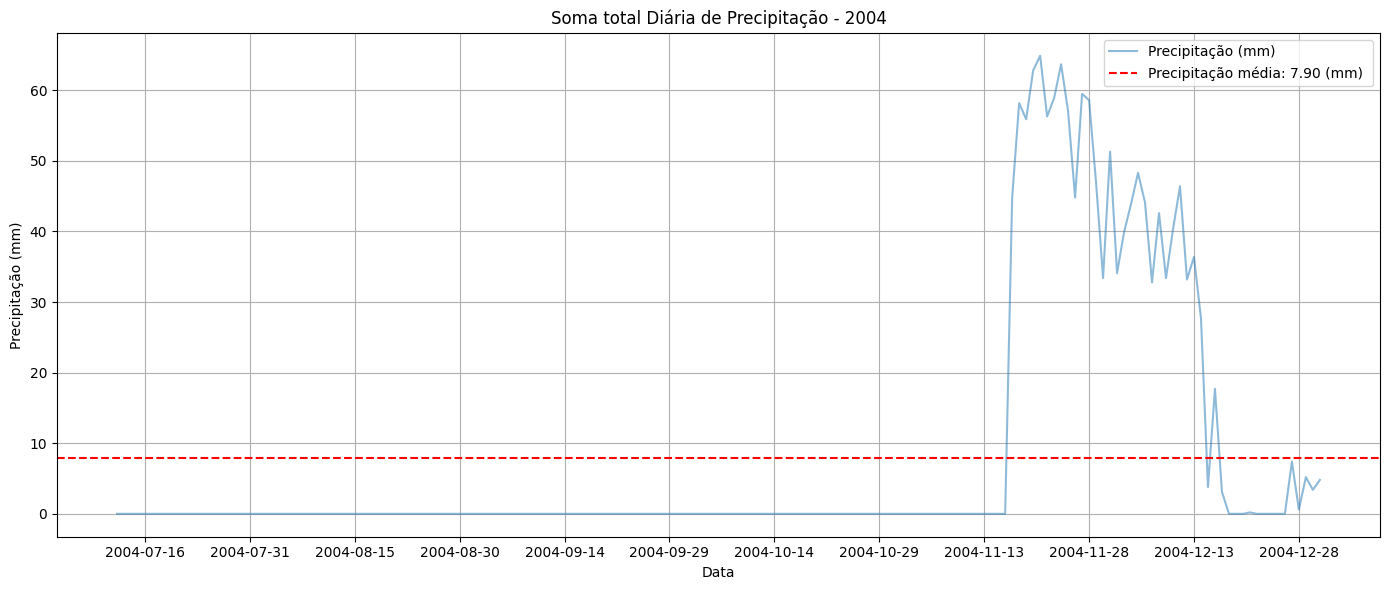

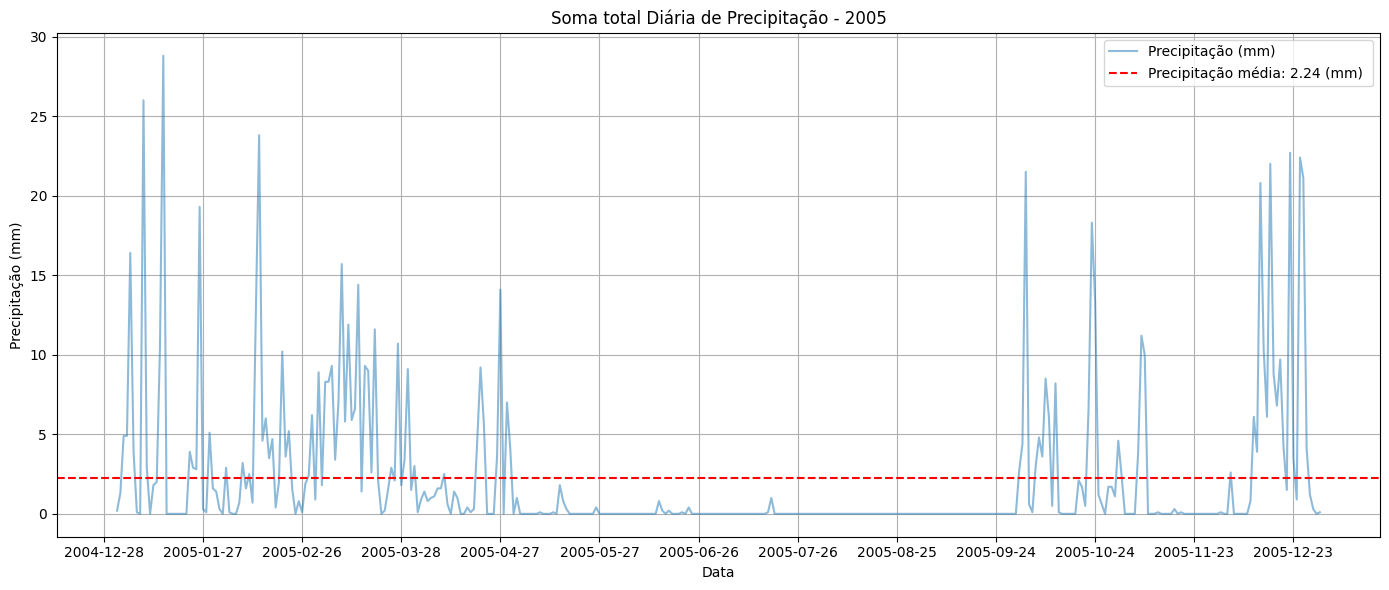

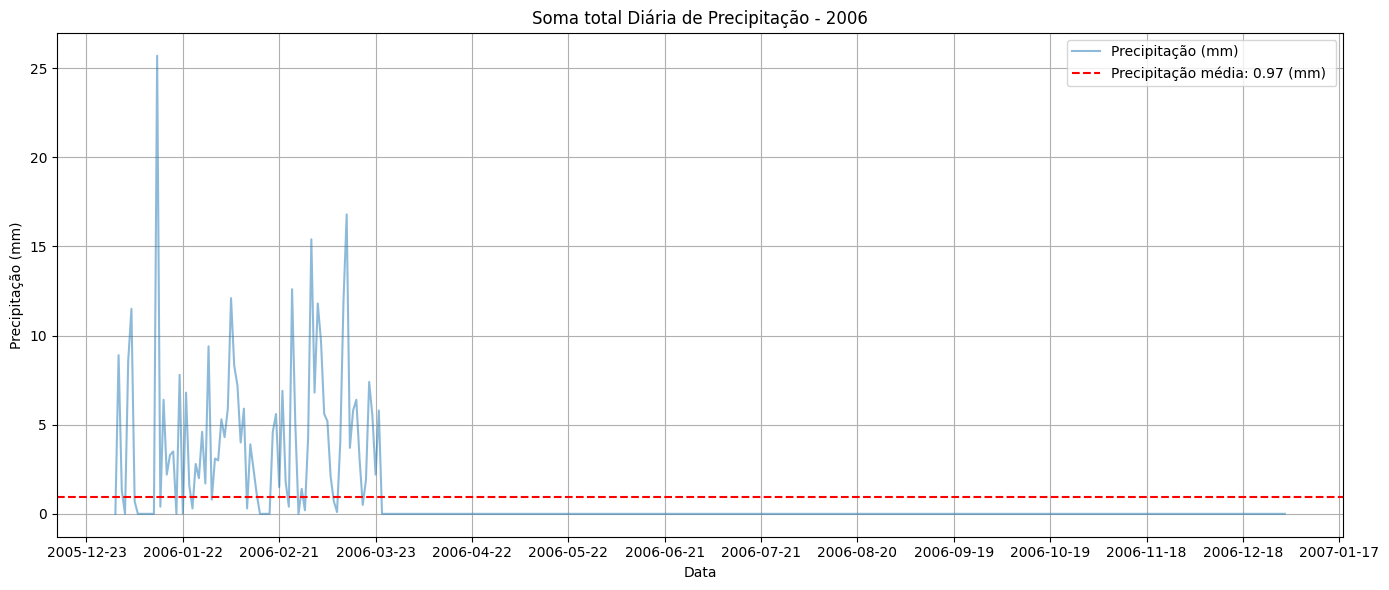

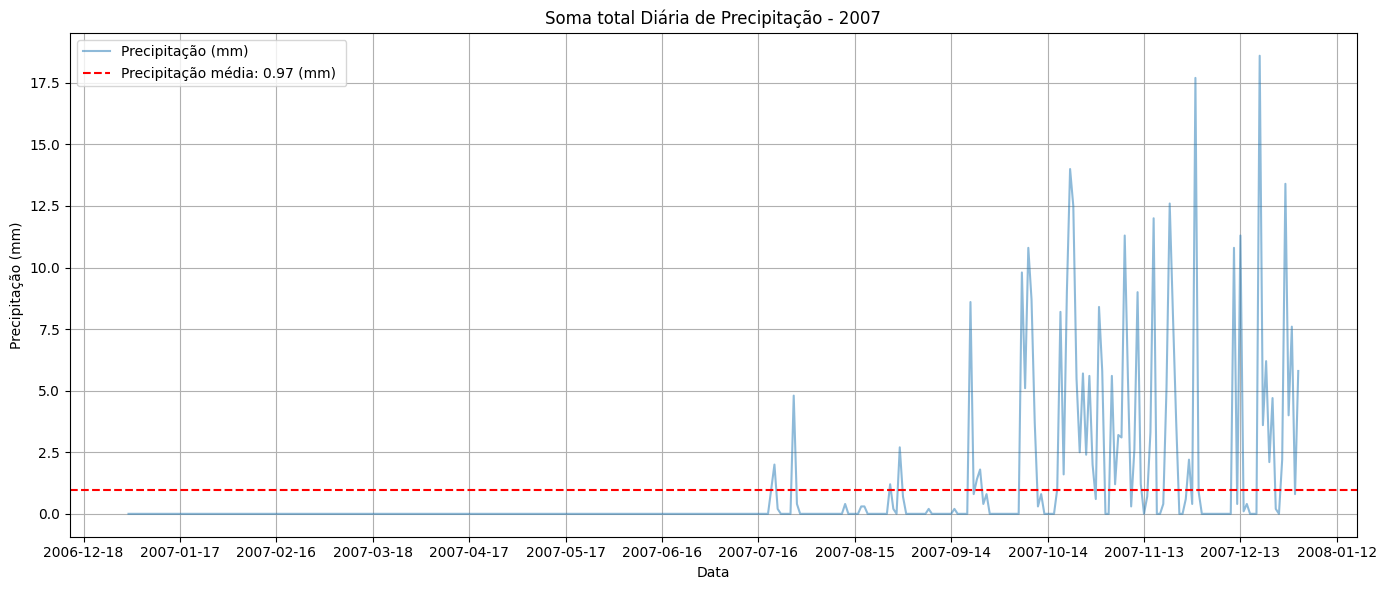

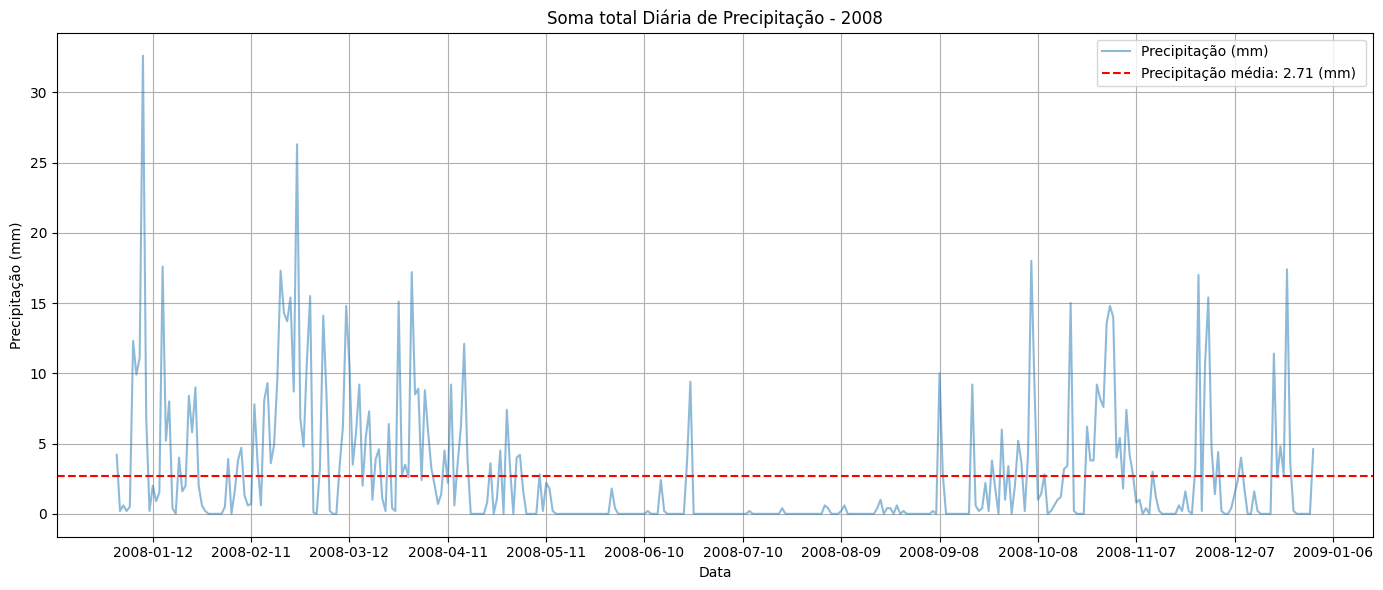

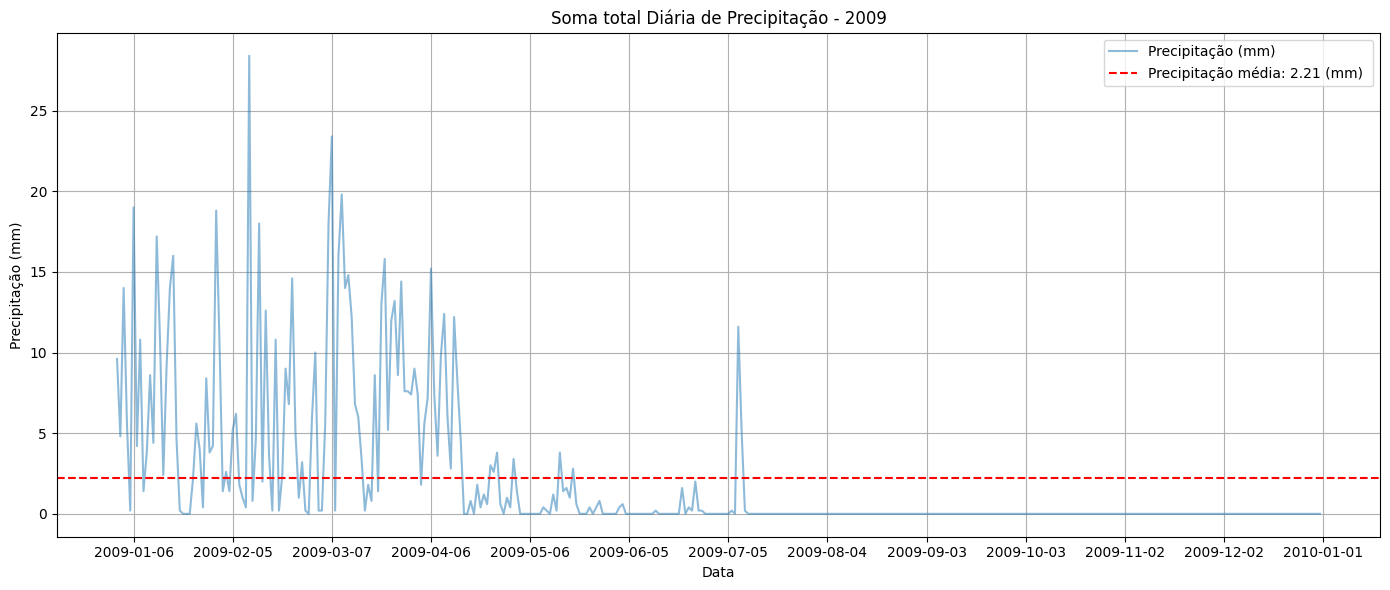

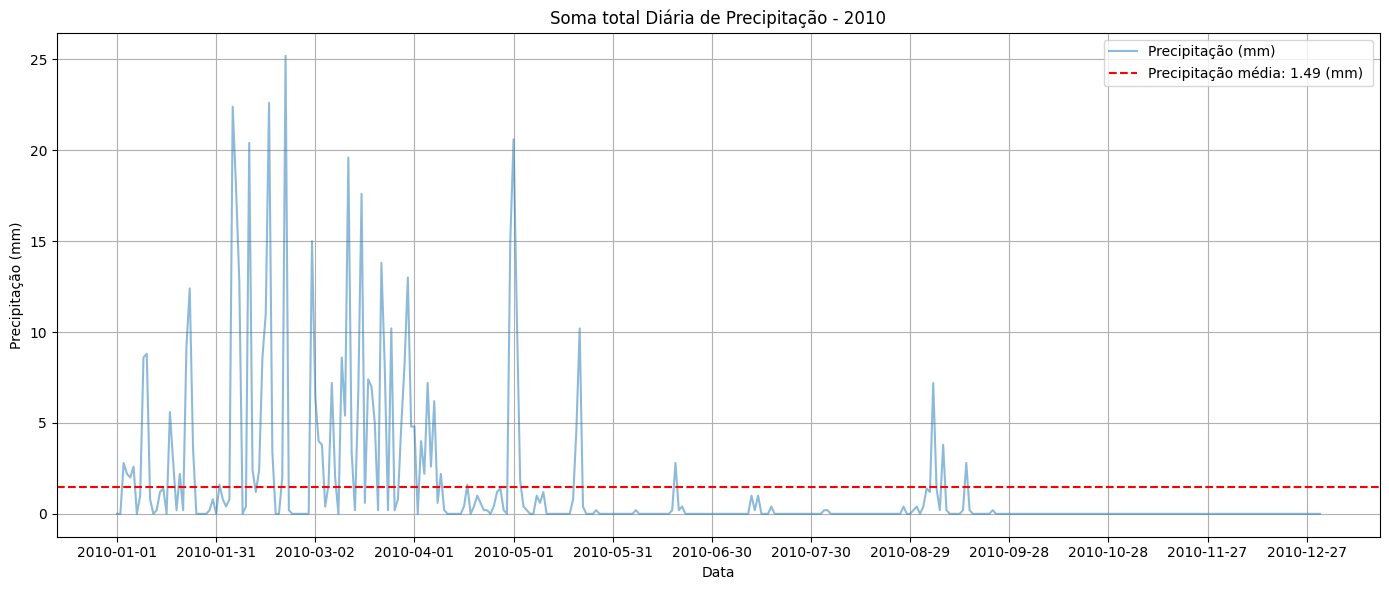

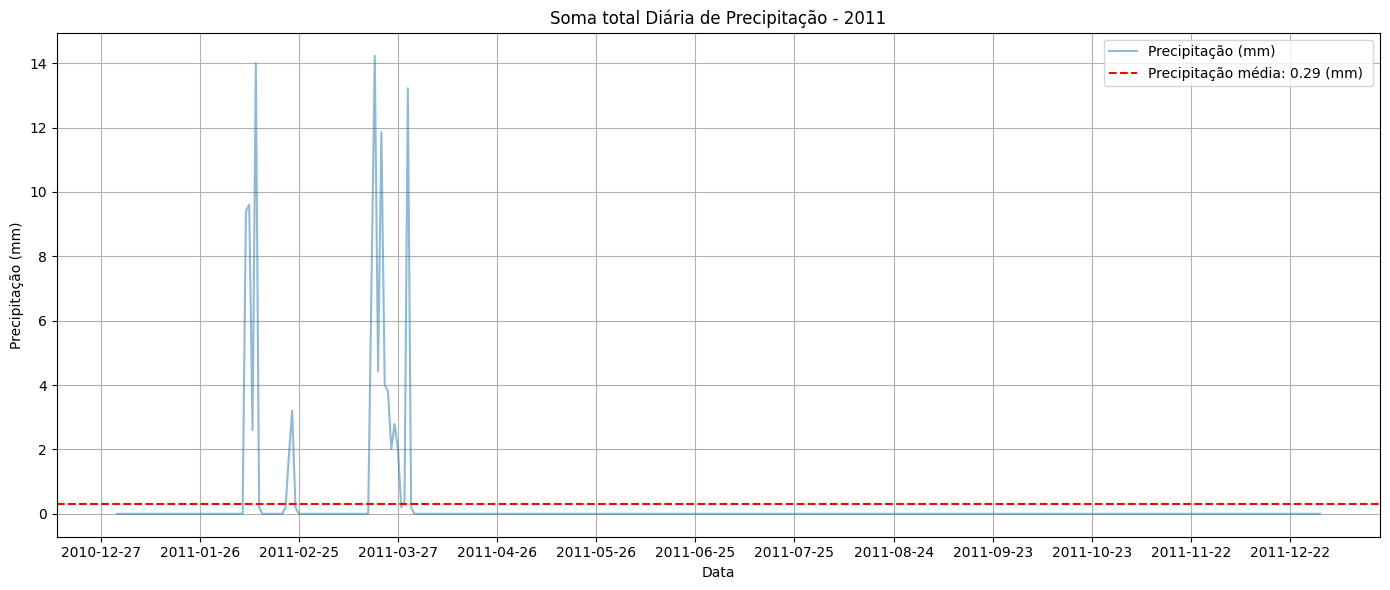

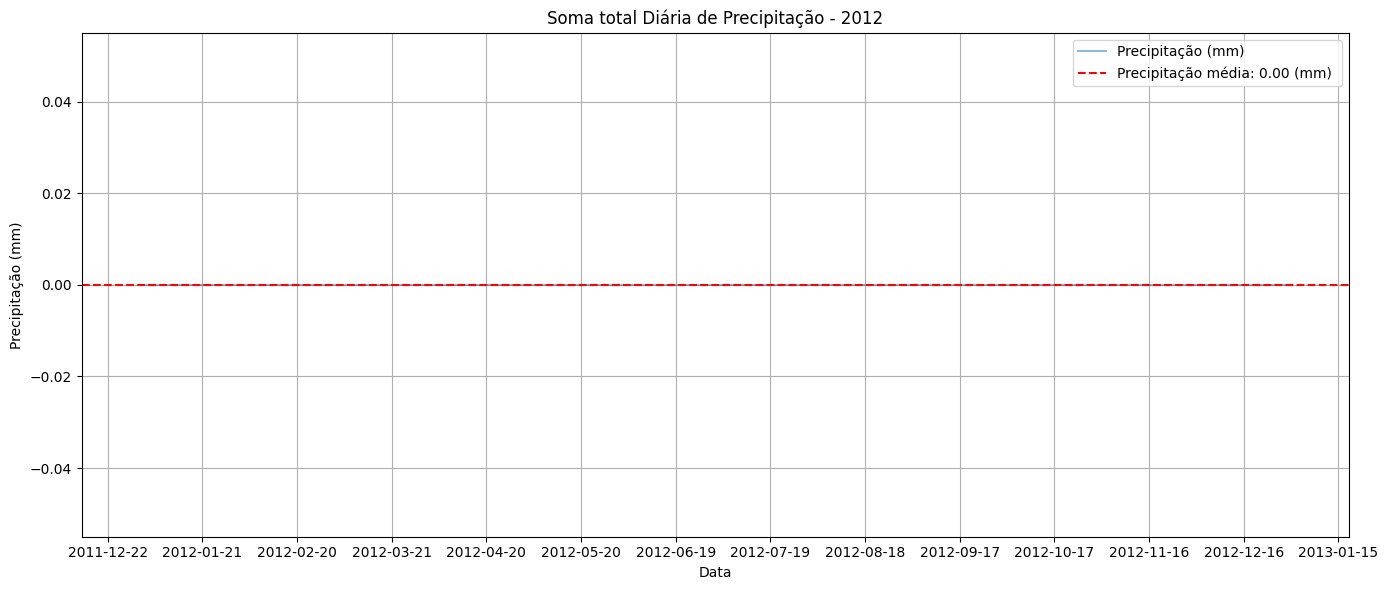

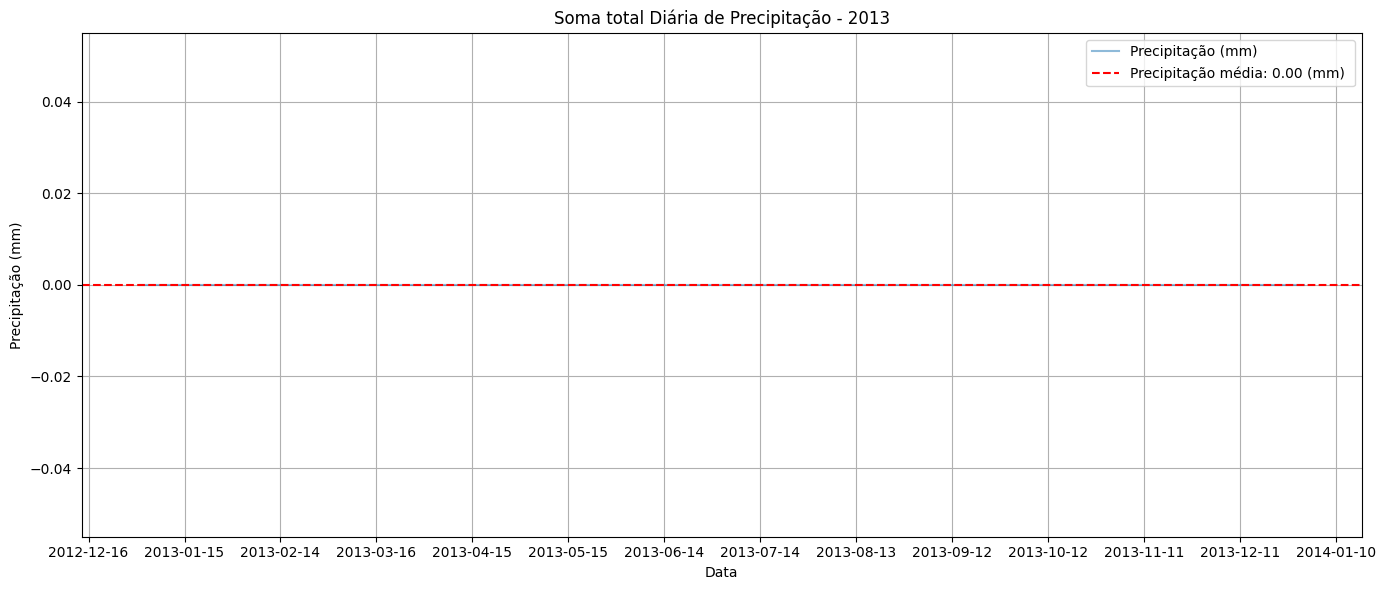

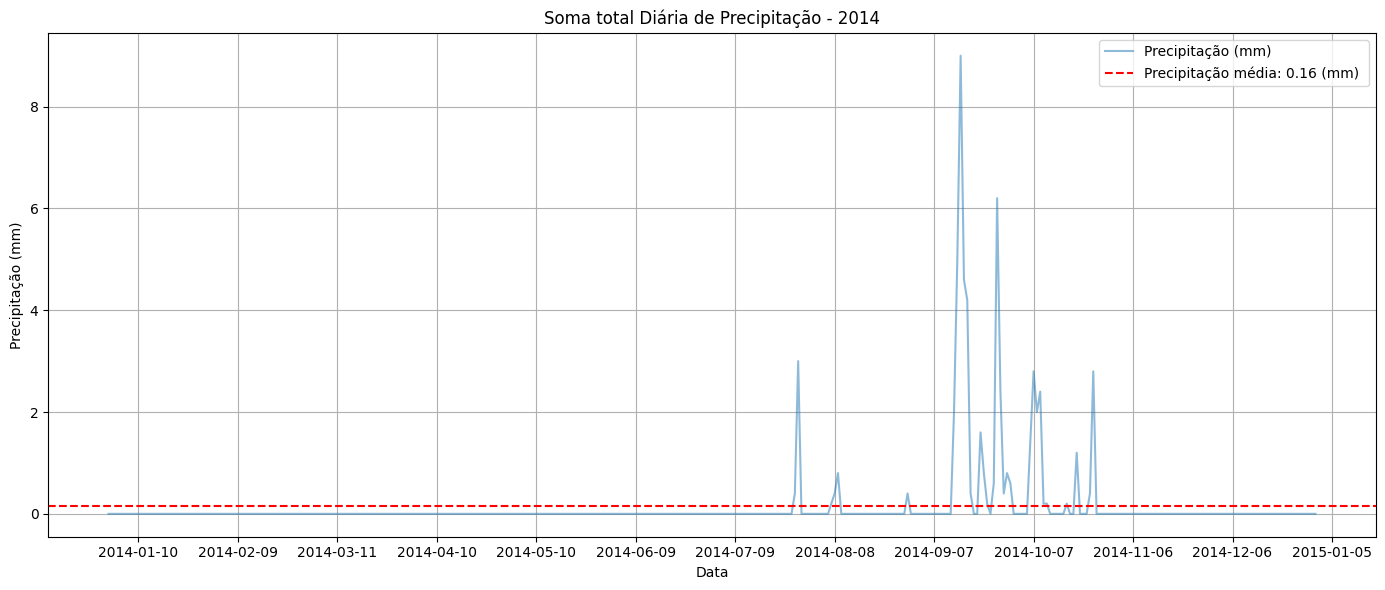

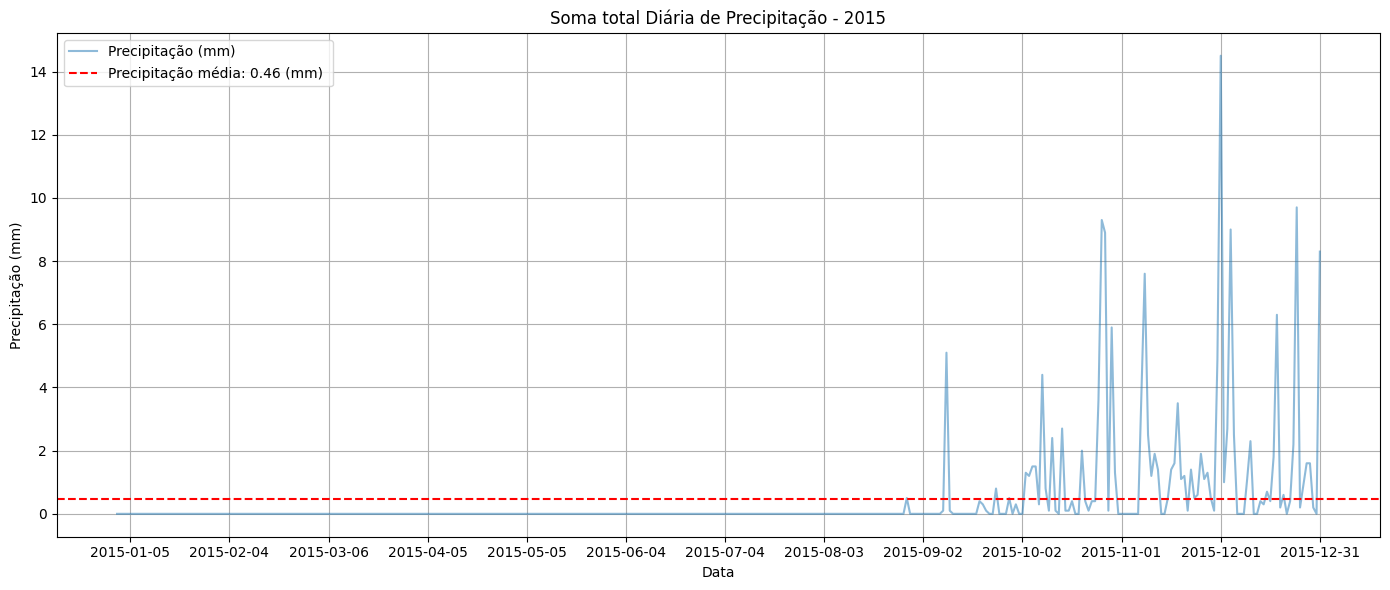

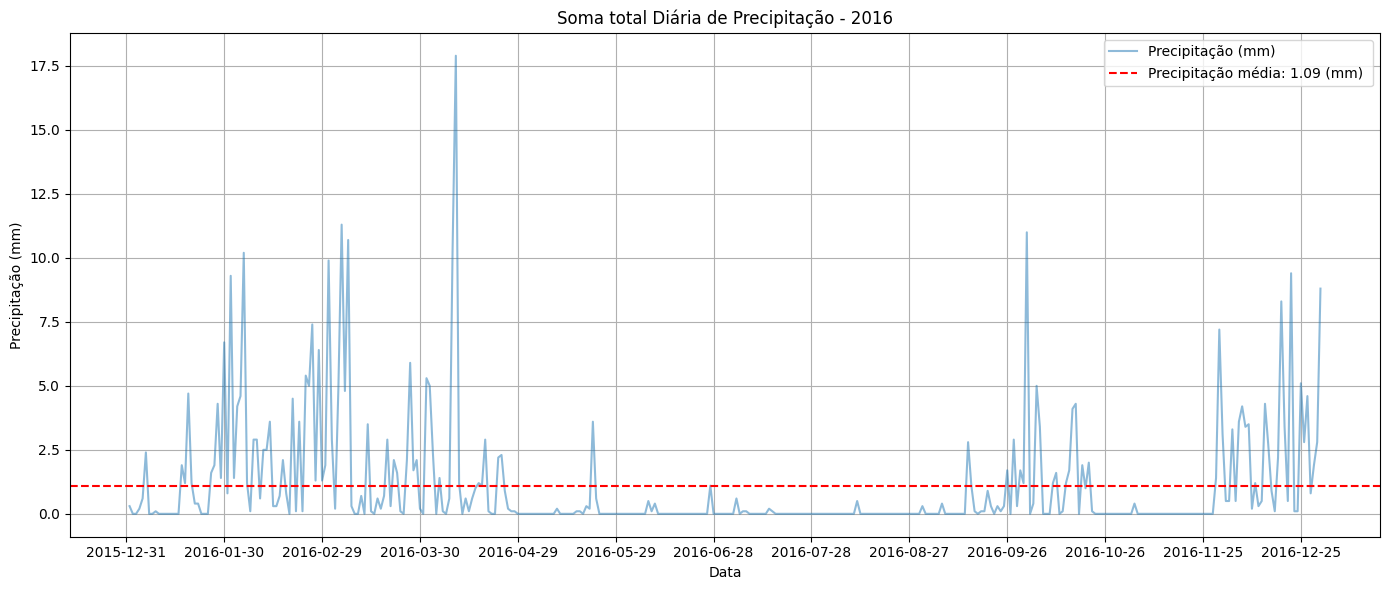

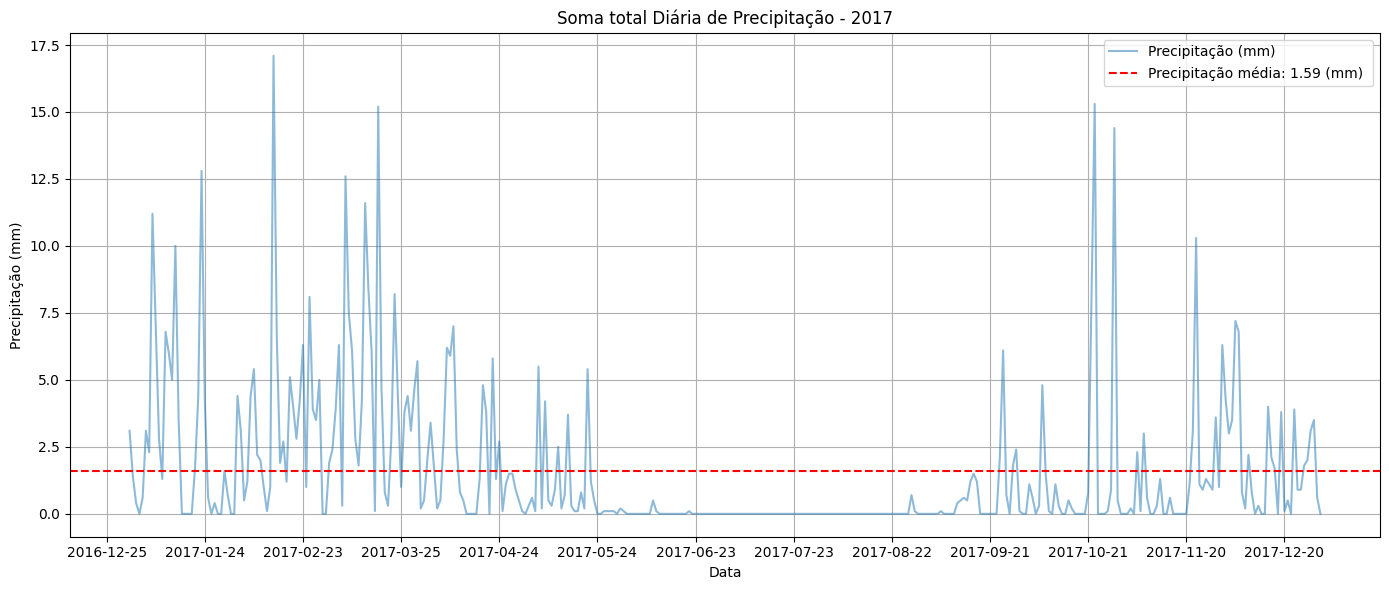

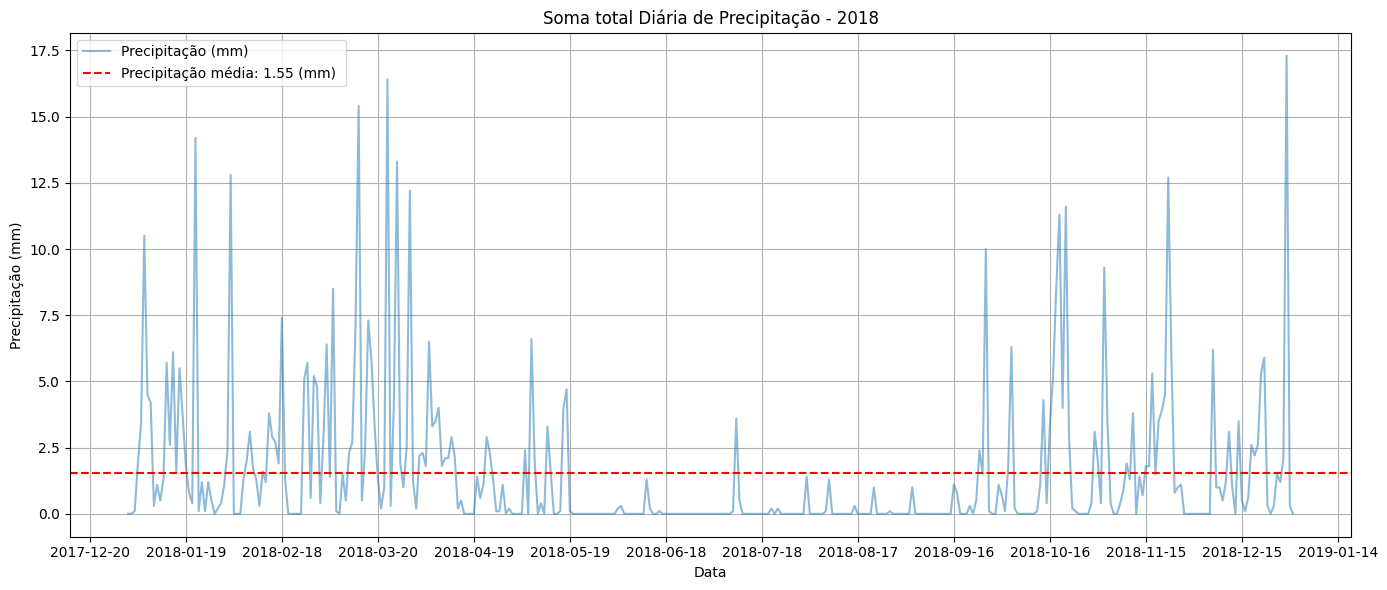

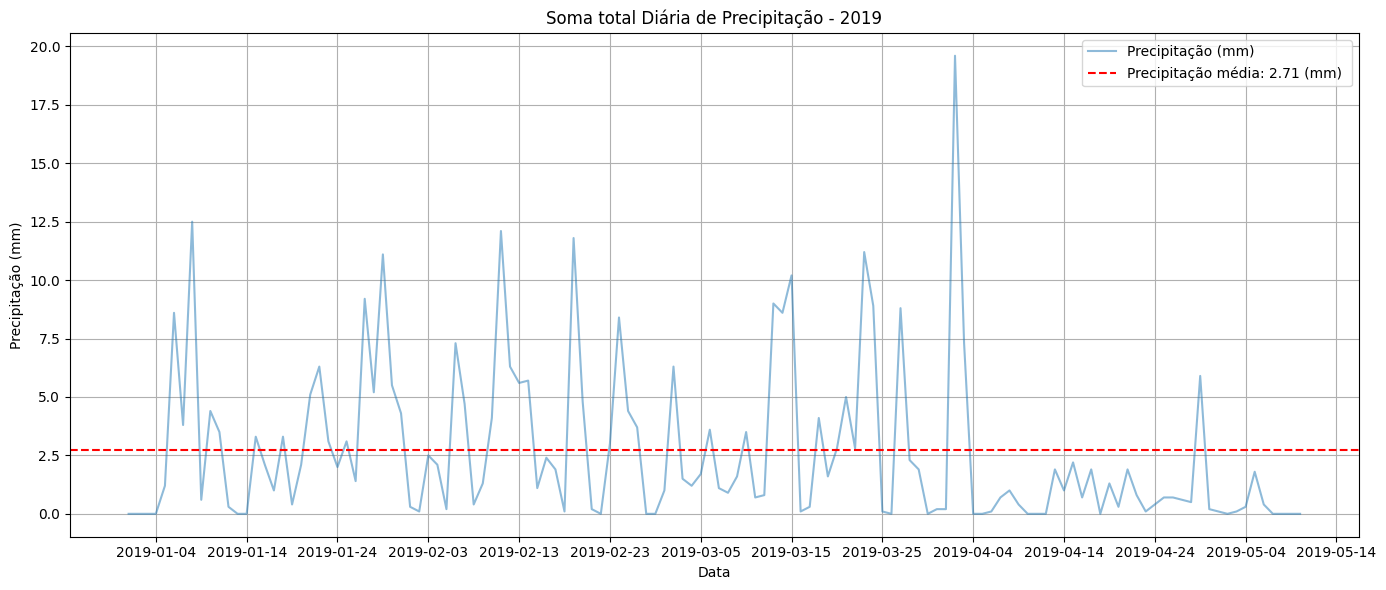

In [7]:
# Cria uma lista com os anos que possui no conjunto de dados
anos_unicos = df['data'].dt.year.unique()

for ano in anos_unicos:

    # Filtrar os dados para o ano atual
    df_ano = df[df["data"].dt.year ==  ano]

    #Criação do grafico

    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(df_ano["data"], df_ano['soma'], label=f"Precipitação (mm)", alpha=0.5)

    # Calculo de precipitação média para aquele ano e colocando uma linha vermelha para marcar
    precipitacao_media = df_ano["soma"].mean()
    ax.axhline(y=precipitacao_media, color="Red", linestyle="--", label=f"Precipitação média: {precipitacao_media:.2f} (mm) ")

    # Quantidade de datas que irá aparecer no eixo x
    ax.xaxis.set_major_locator(plt.MaxNLocator(15))

    plt.title(f"Soma total Diária de Precipitação - {ano}") # Titulo do grafico
    plt.xlabel("Data") # Rotulo para o eixo x
    plt.ylabel("Precipitação (mm)") # Rotulo para o eixo y
    plt.legend() # Legenda
    plt.grid() # grade
    plt.tight_layout() # Ajustar layout
    plt.show()



In [8]:
anos_unicos = df["data"].dt.year.unique()

soma_por_ano = []

for ano in anos_unicos:
    df_ano = df[df["data"].dt.year== ano ]
    soma_ano = sum(df_ano['soma'])
    print(f"A soma de todas as precipitação diárias em {ano} é: {soma_ano:.2f}")
    soma_por_ano.append(soma_ano)


A soma de todas as precipitação diárias em 2004 é: 1366.30
A soma de todas as precipitação diárias em 2005 é: 819.00
A soma de todas as precipitação diárias em 2006 é: 354.00
A soma de todas as precipitação diárias em 2007 é: 355.40
A soma de todas as precipitação diárias em 2008 é: 990.40
A soma de todas as precipitação diárias em 2009 é: 808.40
A soma de todas as precipitação diárias em 2010 é: 544.00
A soma de todas as precipitação diárias em 2011 é: 107.59
A soma de todas as precipitação diárias em 2012 é: 0.00
A soma de todas as precipitação diárias em 2013 é: 0.00
A soma de todas as precipitação diárias em 2014 é: 57.60
A soma de todas as precipitação diárias em 2015 é: 166.50
A soma de todas as precipitação diárias em 2016 é: 399.60
A soma de todas as precipitação diárias em 2017 é: 581.30
A soma de todas as precipitação diárias em 2018 é: 565.20
A soma de todas as precipitação diárias em 2019 é: 352.80


In [9]:
media_2013_a_2019 = sum(soma_por_ano)/len(soma_por_ano)

In [10]:
print(f"A média de precipitação anual entre 2013 a 2020 foi de: {media_2013_a_2019:.2f}")

A média de precipitação anual entre 2013 a 2020 foi de: 466.76


In [11]:
f = "/home/matheus/Documentos/LACRIO/Analises/Cordillera Blanca/Weather Station Data/Llanganuco_LLANWX_12Jul04_10May19.csv"
dados = pd.read_csv(f, encoding="latin1")
# Para o calculo da media
media = dados

/tmp/ipykernel_17063/4074223258.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv(f, encoding="latin1")


In [12]:

# Converter a coluna de data para o formato datetime
dados['Data'] = pd.to_datetime(dados['Datetime'], format='%m/%d/%Y %H:%M')

# Extrair informações de mês e ano
dados['Mês'] = dados['Data'].dt.month
dados['Ano'] = dados['Data'].dt.year

In [13]:
# Calculo da media

media['Datetime'] = pd.to_datetime(media['Datetime'], format='%m/%d/%Y %H:%M')

# Faz com que o datetime vire um index
media.set_index('Datetime', inplace=True)

# Calcular a soma diária da variável de precipitação
soma_diaria = media['Precipitation (mm)'].resample('D').sum()

# Criar listas separadas de datas e soma
datas = soma_diaria.index.strftime('%m/%d/%Y').tolist()  # Converter as datas para string no formato desejado
somas = soma_diaria.tolist()  # Converter as somas para uma lista
datas = pd.to_datetime(datas)
media = pd.DataFrame({'data': datas, 'soma': somas})
precipitacao_media = media['soma'].mean()

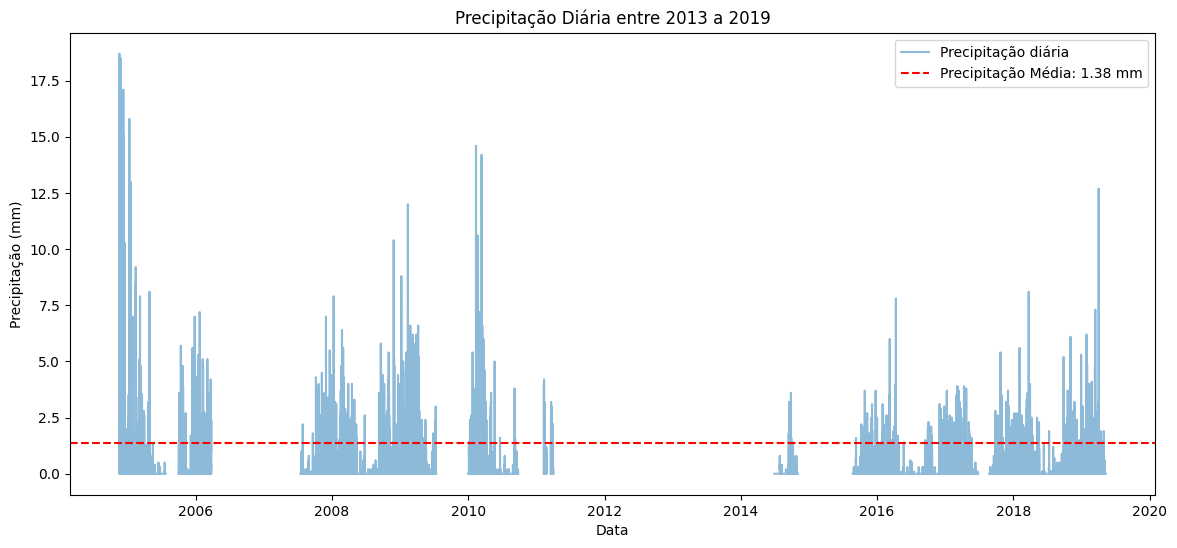

In [14]:

# Gráfico 1: Precipitação ao longo do tempo
plt.figure(figsize=(14, 6))
plt.plot(dados['Data'], dados['Precipitation (mm)'], label='Precipitação diária', alpha=0.5)

 # Adicionar a linha de precipitação média com valor na legenda
plt.axhline(y=precipitacao_media, color='red', linestyle='--', label=f'Precipitação Média: {precipitacao_media:.2f} mm')

plt.title('Precipitação Diária entre 2013 a 2019')
plt.xlabel('Data')
plt.ylabel('Precipitação (mm)')
plt.legend()

plt.show()


/tmp/ipykernel_17063/3840404061.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv(f, encoding="latin1")
/tmp/ipykernel_17063/3840404061.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_17063/3840404061.py:37: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


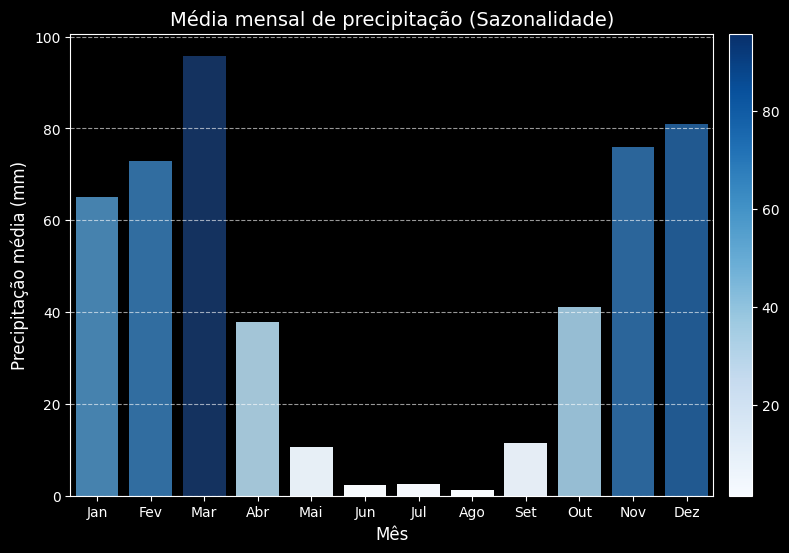

In [15]:
# Gráfico 2: Média mensal para destacar sazonalidade

f = "/home/matheus/Documentos/LACRIO/Analises/Cordillera Blanca/Weather Station Data/Llanganuco_LLANWX_12Jul04_10May19.csv"
dados = pd.read_csv(f, encoding="latin1")


# Converter a coluna de data para o formato datetime
dados['Datetime'] = pd.to_datetime(dados['Datetime'], format='%m/%d/%Y %H:%M')

# Faz com que o datetime vire um index
dados.set_index('Datetime', inplace=True)

# Calcular a soma mensal da variável de precipitação
soma_mensal = dados['Precipitation (mm)'].resample('ME').sum()

# Criar listas separadas de datas e soma
datas = soma_mensal.index.strftime('%m/%d/%Y').tolist()  # Converter as datas para string no formato desejado
somas = soma_mensal.tolist()  # Converter as somas para uma lista
datas = pd.to_datetime(datas)
df = pd.DataFrame({'Data': datas, 'soma': somas})

# Extrair informações de mês e ano
df['Mês'] = df['Data'].dt.month
df['Ano'] = df['Data'].dt.year

media_mensal = df.groupby('Mês')['soma'].mean()


# Criar uma escala de cores baseada nos valores de precipitação
norm = mcolors.Normalize(vmin=media_mensal.min(), vmax=media_mensal.max())  # Normalização para o range dos dados
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)  # Usando a paleta 'viridis'

plt.style.use('dark_background')

# Adicionar as cores ao gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    x=media_mensal.index,
    y=media_mensal.values,
    palette=sns.color_palette('Blues', as_cmap=True)(norm(media_mensal.values))
)

# Configurações do gráfico
plt.title('Média mensal de precipitação (Sazonalidade)', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Precipitação média (mm)', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# Adicionar uma barra de cores
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical', pad=0.02)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

/tmp/ipykernel_17063/1782876411.py:8: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv(f, encoding="latin1")
/tmp/ipykernel_17063/1782876411.py:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_date_range = pd.date_range(start=start_date, end=end_date, freq='1H')
/tmp/ipykernel_17063/1782876411.py:49: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  soma_mensal = dados_filtrados['Precipitation (mm)'].resample('M').sum()
/tmp/ipykernel_17063/1782876411.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_17063/1782876411.py:66: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will bec

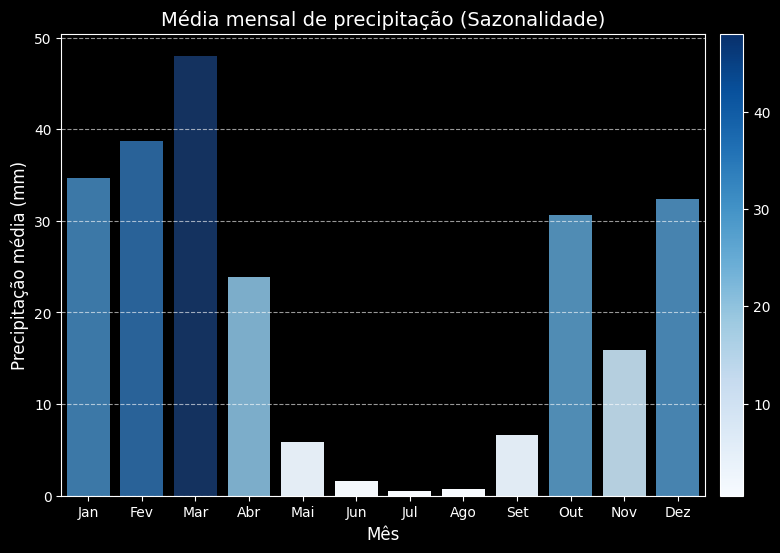

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Carregar os dados
f = "/home/matheus/Documentos/LACRIO/Analises/Cordillera Blanca/Weather Station Data/Llanganuco_LLANWX_12Jul04_10May19.csv"
dados = pd.read_csv(f, encoding="latin1")

# Converter a coluna de data para o formato datetime
dados['Datetime'] = pd.to_datetime(dados['Datetime'], format='%m/%d/%Y %H:%M')

# Definir a coluna 'Datetime' como índice
dados.set_index('Datetime', inplace=True)

# Remover duplicatas no índice
dados = dados[~dados.index.duplicated(keep='first')]

# Determinar os anos mínimo e máximo do conjunto de dados
min_year = dados.index.year.min()
max_year = dados.index.year.max()

# Definir o intervalo de datas abrangendo anos completos
start_date = f"{int(min_year)}-01-01 00:00"
end_date = f"{int(max_year)}-12-31 23:59"

# Criar um intervalo completo com frequência de 1 hora
full_date_range = pd.date_range(start=start_date, end=end_date, freq='1H')

# Reindexar o DataFrame para o intervalo completo de datas e horários
dados_full = dados.reindex(full_date_range)

# Renomear o índice para 'Datetime'
dados_full.index.name = 'Datetime'

# Adicionar uma coluna de ano para análise
dados_full['Ano'] = dados_full.index.year

# Calcular o percentual de valores ausentes por ano
percent_nan_por_ano = dados_full['Precipitation (mm)'].isna().groupby(dados_full['Ano']).mean() * 100

# Selecionar apenas os anos com menos de 10% de NaN
anos_validos = percent_nan_por_ano[percent_nan_por_ano < 20].index

# Filtrar o DataFrame para conter apenas os anos válidos
dados_filtrados = dados_full[dados_full['Ano'].isin(anos_validos)]

# Calcular a soma mensal da variável de precipitação
soma_mensal = dados_filtrados['Precipitation (mm)'].resample('M').sum()

# Criar um DataFrame com mês e soma mensal
df = pd.DataFrame({'Data': soma_mensal.index, 'soma': soma_mensal.values})
df['Mês'] = df['Data'].dt.month

# Calcular a média mensal
media_mensal = df.groupby('Mês')['soma'].mean()

# Criar uma escala de cores baseada nos valores de precipitação
norm = mcolors.Normalize(vmin=media_mensal.min(), vmax=media_mensal.max())
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)

plt.style.use('dark_background')

# Adicionar as cores ao gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    x=media_mensal.index,
    y=media_mensal.values,
    palette=sns.color_palette('Blues', as_cmap=True)(norm(media_mensal.values))
)

# Configurações do gráfico
plt.title('Média mensal de precipitação (Sazonalidade)', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Precipitação média (mm)', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# Adicionar uma barra de cores
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical', pad=0.02)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [30]:
anos_validos

Index([2005, 2008, 2016, 2017, 2018], dtype='int32', name='Ano')